In [6]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

# Линейная регрессия

In [44]:
import pandas as pd

In [3]:
example1 = pd.DataFrame({'x': [1,2,3,4,5], 'y':[10,20,30,40,50]})

In [4]:
example1.corr()

,x,y
x,1.0,1.0
y,1.0,1.0


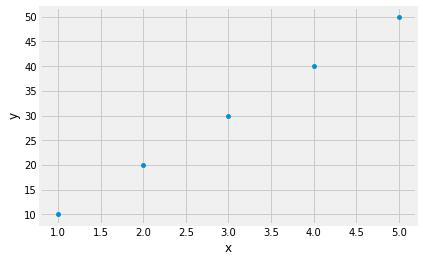

In [7]:
example1.plot(kind='scatter', x='x', y='y')

# Модель

![equ](https://wikimedia.org/api/rest_v1/media/math/render/svg/962777d4dfe335c208e50572d273fa4d24250e0d)

где 
* бета - коэффициент наклона, 
* альфа - значение сдвига (константа, значение при x=0)
* эпсилон представляет "ошибку" (остаток)

In [14]:
def predict(alpha, beta, x_i):
    return alpha + beta*x_i

А ошибка?

In [15]:
def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

Аггрегация - сумма квадратов ошибки

In [18]:
def sum_square_error(alpha, beta, X, y):
    sum(error(alpha, beta, X_i, y_i)**2 for X_i, y_i in zip(X,y))

Как найти альфу и бету?

In [23]:
def _get_beta(x, y):
    return x.corr(y) * y.std() / x.std()

def _get_alpha(x, y, beta):
    return y.mean() - x.mean() * beta

In [24]:
def least_square_fit(x, y):
    beta = _get_beta(x, y)
    alpha = _get_alpha(x, y, beta)
    return alpha, beta

In [26]:
alpha, beta = least_square_fit(example1['x'], example1['y'])
alpha, beta

(0.0, 10.0)

In [29]:
predict(alpha, beta, 2)

20.0

## Example 2

In [5]:
path = 'https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv'
df = pd.read_csv(path)

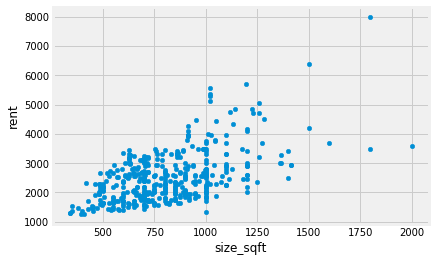

In [11]:
df.plot(kind='scatter', x='size_sqft', y='rent')

In [30]:
alpha, beta = least_square_fit(df['size_sqft'], df['rent'])
alpha, beta

(925.8281552470216, 1.9589034697057623)

In [32]:
line_x = pd.np.linspace(0, 2000, 100)

In [34]:
line_y = predict(alpha, beta, line_x)

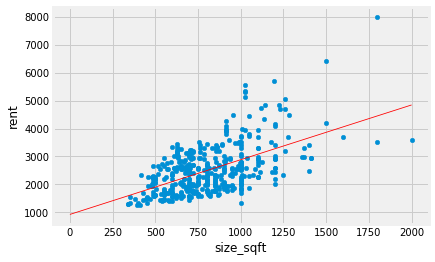

In [37]:
ax = df.plot(kind='scatter', x='size_sqft', y='rent')
ax.plot(line_x, line_y, color='red', linewidth=.8)

In [38]:
from sklearn.metrics import r2_score

In [41]:
y_pred = predict(alpha, beta, df['size_sqft'])

In [43]:
r2_score(df['rent'], y_pred)

0.3010369635185809

## Multiple linear regression

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [46]:
y = df.rent

In [48]:
use_cols = [ 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee']

In [49]:
X = df[use_cols]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=123)

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
model.score(X_test, y_test)

0.6841364798088041

In [55]:
pd.Series(model.coef_, index=X.columns)

bedrooms            204.921727
bathrooms           442.579772
size_sqft             1.083409
min_to_subway        -7.063427
floor                36.303760
building_age_yrs     -6.786928
no_fee              244.785117
dtype: float64

In [56]:
model.intercept_

882.2180301277663

In [57]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for metric in  mean_absolute_error, mean_squared_error, r2_score:
     print(f'{metric.__name__}: {metric(y_pred, y_test)}')

mean_absolute_error: 367.7726702506006
mean_squared_error: 254876.50685847973
r2_score: 0.3960919788620978


### Мультиколлинеарность

In [58]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
print(f'{est.fit().f_pvalue:.100f}')

0.0000000000000000000000000000000000000000000000000000000000000000000000000117010172155252875839337854


In [67]:
est.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     90.56
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           1.17e-74
Time:                        23:31:56   Log-Likelihood:                -2734.4
No. Observations:                 358   AIC:                             5485.
Df Residuals:                     350   BIC:                             5516.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              882.2180    140.162      6.294      0.000     606.552    1157.884
bedrooms           204.9217     52.526      3.901      0.000     101.615     308.229
bathrooms          442.5798     82.805      5.345      0.000     279.721     605.438
size_sqft            1.0834      0.176      6.164      0.000       0.738       1.429
min_to_subway       -7.0634      4.193     -1.685      0.093     -15.309       1.183
floor               36.3038      5.649      6.427      0.000      25.194      47.413
building_age_yrs    -6.7869      0.879     -7.721      0.000      -8.516      -5.058
no_fee             244.7851     60.481      4.047      0.000     125.833     363.737
==============================================================================
Omnibus:                       98.599   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              479.655
Skew:                           1.072   Prob(JB):                    6.99e-105
Kurtosis:                       8.249   Cond. No.                     4.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# В итоге

Плюсы:
 
 - интерпретируемость
 - экстраполяция
 - после тренировки занимает O(1) операций, очень маленькая (F+1 цифры, где F - количество фич)
 - легко предсказывать батчами (умножение матриц и суммация)
 - не нужно скейлить *
 - можно описать confidence interval и отбрасывть вне него
 
Минусы:
 - не робастна
 - только линейные зависимости *
 - проблемы при мультиколлинеарности и зависимости ошибки от независимых переменных